In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# linkage: 계층형 군집분석
# dendrogram
# fcluster: linkage 로부터 얻은 값으로 군집 생성
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# 데이터 표준화
from sklearn.preprocessing import StandardScaler

# Kmeans 군집 분석, DBSCAN 군집분석
from sklearn.cluster import KMeans, DBSCAN

# font manager
import matplotlib.font_manager as fm
# font list 를 돌면서, 나눔고딕을 찾는다!!

In [2]:
import matplotlib

# font manager
import matplotlib.font_manager as fm
# font list 를 돌면서, 나눔고딕을 찾는다!!
for f in fm.fontManager.ttflist:
    if 'NanumBarunGothic' in f.fname: plt.rcParams['font.family']='NanumBarunGothic'
    # 폰트 나눔고딕으로

print(plt.rcParams['font.family'])

matplotlib.rcParams['axes.unicode_minus'] = False # '-'기호 제대로 나오게

['NanumBarunGothic']


In [3]:
test_data = pd.read_csv("merged.csv", encoding="EUC-KR")
test_data.head()
print(type(test_data))

<class 'pandas.core.frame.DataFrame'>


In [4]:
test_data.head()

,CustomerID,gender,age,job,marital,province,city,size,exchange,orderID,Item,period
0,1,FEMALE,30대,직장인,MARRIED,충청도,홍성군,55,5.0,1,P,35.0
1,1,FEMALE,30대,직장인,MARRIED,충청도,홍성군,55,5.0,2,O,41.0
2,1,FEMALE,30대,직장인,MARRIED,충청도,홍성군,55,5.0,3,O,34.0
3,1,FEMALE,30대,직장인,MARRIED,충청도,홍성군,55,5.0,4,O,29.0
4,1,FEMALE,30대,직장인,MARRIED,충청도,홍성군,55,5.0,5,L,98.0


In [5]:
test_data_drop = test_data.drop(["CustomerID"],axis=1)

data_x = []
data_y = []
data_z = []

for i in range(len(test_data)):
    if test_data["exchange"][i] < 3:
        data_x.append(test_data["exchange"][i])
    elif test_data["exchange"][i] < 6:
        data_y.append(test_data["exchange"][i])
    else:
        data_z.append(test_data["exchange"][i])

In [6]:
# get_dummies: 데이터의 문자형 컬럼에 대한 더미변수 생성
test_data_drop_dummy= pd.get_dummies(test_data_drop)
# 더미변수 생성된 데이터의 상위 5개 row를 확인
test_data_drop_dummy.head()

,exchange,orderID,period,gender_FEMALE,gender_MALE,age_20대,age_30대,age_40대,age_50대,age_60대 이상,...,Item_L,Item_M,Item_N,Item_O,Item_P,Item_Q,Item_R,Item_S,Item_T,Item_U
0,5.0,1,35.0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,5.0,2,41.0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,5.0,3,34.0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,5.0,4,29.0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,5.0,5,98.0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [7]:
# 설명변수, 목표변수
ds_x = test_data_drop_dummy.drop("exchange",axis=1)
ds_y = test_data_drop_dummy["exchange"]

In [8]:
ds_x.head()

,orderID,period,gender_FEMALE,gender_MALE,age_20대,age_30대,age_40대,age_50대,age_60대 이상,job_계약직,...,Item_L,Item_M,Item_N,Item_O,Item_P,Item_Q,Item_R,Item_S,Item_T,Item_U
0,1,35.0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2,41.0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3,34.0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,4,29.0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,5,98.0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


# 설명변수 군집분석

# 연결: Ward, 거리 계산: Euclidean

Z_ward = linkage(ds_x, method="ward", metric="euclidean")

# 연결: average, 거리 계산: Euclidean
#Z_average = linkage(ds_supervisor_x, method="average", metric="euclidean")

# 연결: average, 거리 계산: minkowski
#Z_Minkowski = linkage(ds_supervisor_x, method="average", metric="minkowski")

# 덴드로그램 [연결: ward, 거리 계산: Euclidean]
plt.figure(figsize=(20, 20))
ax = plt.subplot(111)
dendrogram(Z_ward, leaf_font_size=10, orientation="right")
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("distance")
plt.ylabel("sample index")

# linkage 함수를 통해 얻은 Z_ward 행렬 데이터를 이용하여 군집 생성
cluster_hierarchical = fcluster(Z=Z_ward, t=35, criterion="distance")

# 데이터에 계층형 군집 결과 입력
#test_data["ClusterHierarchical"] = cluster_hierarchical

cluster_hierarchical_pd = pd.DataFrame({"cluster":cluster_hierarchical})
print(ds_x.shape)
print(ds_y.shape)
print(cluster_hierarchical_pd.shape)

ds_merged = pd.concat([ds_x,ds_y,cluster_hierarchical_pd],axis=1)
ds_merged.shape

ds_merged.head(50)

ds_merged.groupby("cluster").mean()

In [9]:
ds_y_pd = pd.DataFrame({"y":ds_y})
ds_y_pd.head()

,y
0,5.0
1,5.0
2,5.0
3,5.0
4,5.0


In [10]:
test_data.isnull().sum()

CustomerID    0
gender        0
age           0
job           0
marital       0
province      0
city          0
size          0
exchange      0
orderID       0
Item          0
period        0
dtype: int64

In [11]:
ds_x.head()

,orderID,period,gender_FEMALE,gender_MALE,age_20대,age_30대,age_40대,age_50대,age_60대 이상,job_계약직,...,Item_L,Item_M,Item_N,Item_O,Item_P,Item_Q,Item_R,Item_S,Item_T,Item_U
0,1,35.0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2,41.0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3,34.0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,4,29.0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,5,98.0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [12]:
# 필요 데이터 추출

In [13]:
test_data.head()

,CustomerID,gender,age,job,marital,province,city,size,exchange,orderID,Item,period
0,1,FEMALE,30대,직장인,MARRIED,충청도,홍성군,55,5.0,1,P,35.0
1,1,FEMALE,30대,직장인,MARRIED,충청도,홍성군,55,5.0,2,O,41.0
2,1,FEMALE,30대,직장인,MARRIED,충청도,홍성군,55,5.0,3,O,34.0
3,1,FEMALE,30대,직장인,MARRIED,충청도,홍성군,55,5.0,4,O,29.0
4,1,FEMALE,30대,직장인,MARRIED,충청도,홍성군,55,5.0,5,L,98.0


In [14]:
new_ds = test_data[["gender","age","job","marital"]]

In [15]:
new_ds.head()

,gender,age,job,marital
0,FEMALE,30대,직장인,MARRIED
1,FEMALE,30대,직장인,MARRIED
2,FEMALE,30대,직장인,MARRIED
3,FEMALE,30대,직장인,MARRIED
4,FEMALE,30대,직장인,MARRIED


In [16]:
new_ds_dummy = pd.get_dummies(new_ds)

In [17]:
new_ds_dummy.head()

,gender_FEMALE,gender_MALE,age_20대,age_30대,age_40대,age_50대,age_60대 이상,job_계약직,job_무직,job_자영업,job_전문직,job_직장인,job_학생,marital_MARRIED,marital_SINGLE
0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0
1,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0
2,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0
3,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0
4,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0


Text(0, 0.5, 'sample index')

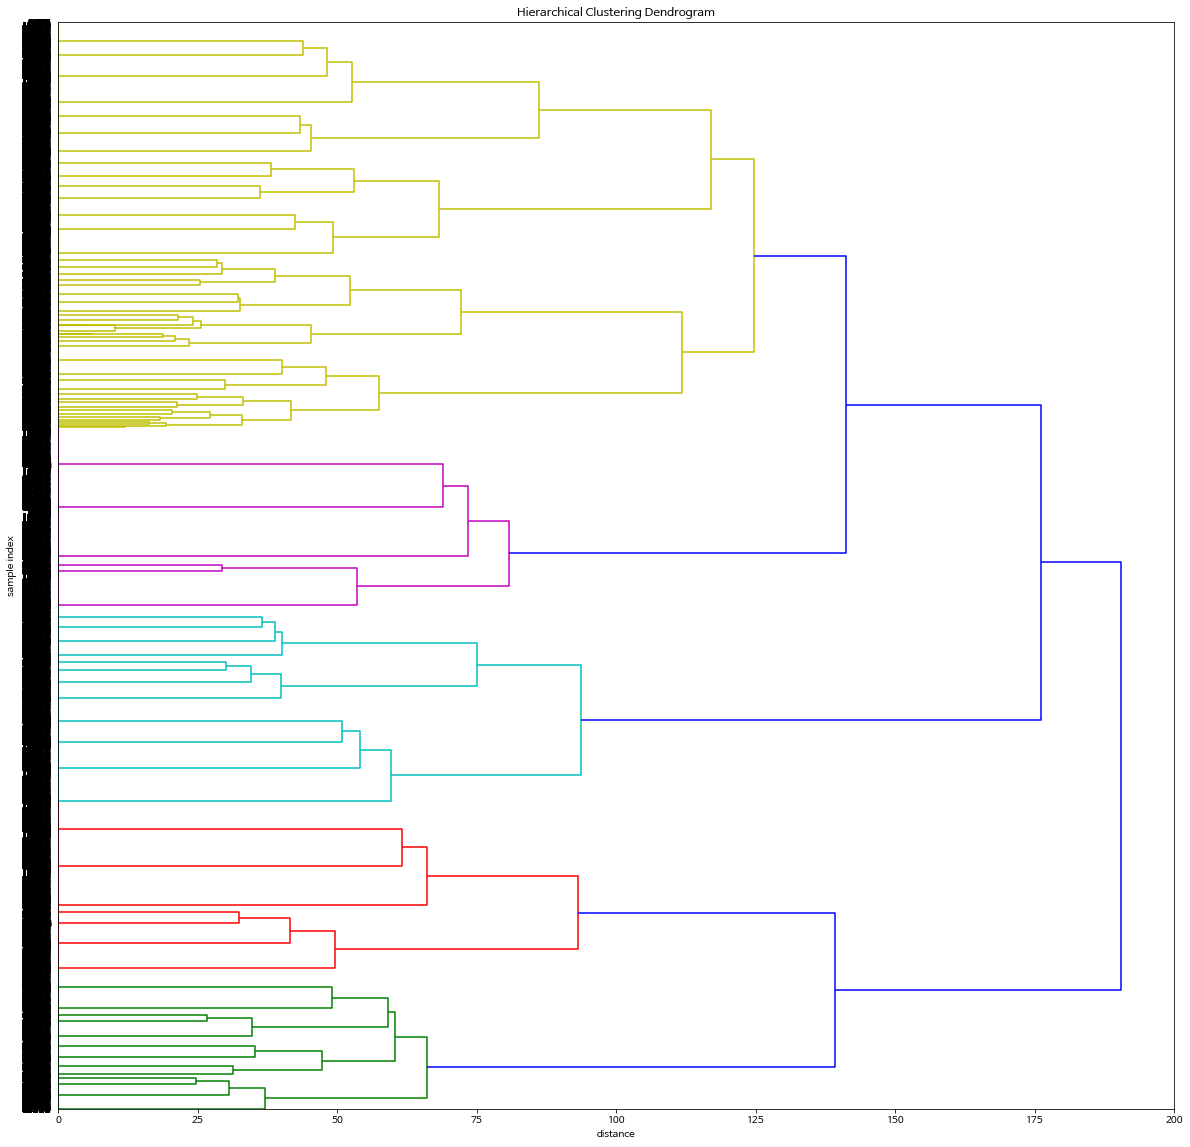

In [18]:
# 목표변수 군집분석

# 연결: Ward, 거리 계산: Euclidean

#ds_y_pd = pd.DataFrame({"y":ds_y})

Z_ward_new = linkage(new_ds_dummy, method="ward", metric="euclidean")


# 덴드로그램 [연결: ward, 거리 계산: Euclidean]
plt.figure(figsize=(20, 20))
ax = plt.subplot(111)
dendrogram(Z_ward_new, leaf_font_size=10, orientation="right")
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("distance")
plt.ylabel("sample index")

In [19]:
# linkage 함수를 통해 얻은 Z_ward 행렬 데이터를 이용하여 군집 생성
cluster_hierarchical_y = fcluster(Z=Z_ward_new, t=100, criterion="distance")

# 데이터에 계층형 군집 결과 입력
#test_data["ClusterHierarchical"] = cluster_hierarchical

In [20]:
cluster_hierarchical_y_pd = pd.DataFrame({"cluster":cluster_hierarchical_y})
print(cluster_hierarchical_y_pd.shape)

(64514, 1)


In [21]:
cluster_hierarchical_y_pd.head()

,cluster
0,4
1,4
2,4
3,4
4,4


In [22]:
new_ds.head()

,gender,age,job,marital
0,FEMALE,30대,직장인,MARRIED
1,FEMALE,30대,직장인,MARRIED
2,FEMALE,30대,직장인,MARRIED
3,FEMALE,30대,직장인,MARRIED
4,FEMALE,30대,직장인,MARRIED


In [23]:
test_data.head()

,CustomerID,gender,age,job,marital,province,city,size,exchange,orderID,Item,period
0,1,FEMALE,30대,직장인,MARRIED,충청도,홍성군,55,5.0,1,P,35.0
1,1,FEMALE,30대,직장인,MARRIED,충청도,홍성군,55,5.0,2,O,41.0
2,1,FEMALE,30대,직장인,MARRIED,충청도,홍성군,55,5.0,3,O,34.0
3,1,FEMALE,30대,직장인,MARRIED,충청도,홍성군,55,5.0,4,O,29.0
4,1,FEMALE,30대,직장인,MARRIED,충청도,홍성군,55,5.0,5,L,98.0


In [24]:
test_data.shape

(64514, 12)

In [25]:
test_data_concat = test_data
test_data_concat["cluster"] = cluster_hierarchical_y_pd
test_data_concat.head()

,CustomerID,gender,age,job,marital,province,city,size,exchange,orderID,Item,period,cluster
0,1,FEMALE,30대,직장인,MARRIED,충청도,홍성군,55,5.0,1,P,35.0,4
1,1,FEMALE,30대,직장인,MARRIED,충청도,홍성군,55,5.0,2,O,41.0,4
2,1,FEMALE,30대,직장인,MARRIED,충청도,홍성군,55,5.0,3,O,34.0,4
3,1,FEMALE,30대,직장인,MARRIED,충청도,홍성군,55,5.0,4,O,29.0,4
4,1,FEMALE,30대,직장인,MARRIED,충청도,홍성군,55,5.0,5,L,98.0,4


In [26]:
test_data_concat["cluster"].max()

8

In [27]:
items = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U"]

In [28]:
numofcluster = test_data_concat["cluster"].max()

In [29]:
cluster_total = []

for i in range(numofcluster):
    cluster_total.append(test_data_concat[test_data_concat["cluster"] == i+1 ])


In [30]:
cluster_total

[       CustomerID gender  age  job marital province city size  exchange  \
 43              9   MALE  40대  자영업  SINGLE      서울시  양천구    L       6.7   
 44              9   MALE  40대  자영업  SINGLE      서울시  양천구    L       6.7   
 45              9   MALE  40대  자영업  SINGLE      서울시  양천구    L       6.7   
 46              9   MALE  40대  자영업  SINGLE      서울시  양천구    L       6.7   
 47              9   MALE  40대  자영업  SINGLE      서울시  양천구    L       6.7   
 48              9   MALE  40대  자영업  SINGLE      서울시  양천구    L       6.7   
 49              9   MALE  40대  자영업  SINGLE      서울시  양천구    L       6.7   
 50              9   MALE  40대  자영업  SINGLE      서울시  양천구    L       6.7   
 51              9   MALE  40대  자영업  SINGLE      서울시  양천구    L       6.7   
 61             11   MALE  20대  직장인  SINGLE      전라도  광양시    M       3.6   
 62             11   MALE  20대  직장인  SINGLE      전라도  광양시    M       3.6   
 63             11   MALE  20대  직장인  SINGLE      전라도  광양시    M       3.6   
 64         

In [31]:
cluster_total[2].marital.value_counts()

MARRIED    11646
Name: marital, dtype: int64

In [32]:
cluster_total[0].Item.value_counts()

B    562
C    545
K    538
A    524
J    501
F    484
E    475
R    422
I    412
H    374
Q    373
D    350
T    349
G    335
M    328
N    327
S    326
U    310
O    306
L    304
P    225
Name: Item, dtype: int64

In [33]:
cluster_total[1].Item.value_counts()

M    743
S    722
T    696
R    674
N    590
O    573
Q    552
U    522
E    472
F    465
B    448
C    400
K    392
P    384
A    375
J    372
I    356
D    307
L    298
H    292
G    270
Name: Item, dtype: int64

In [34]:
cluster_total[2].Item.value_counts()

J    786
A    751
F    742
E    723
K    718
B    713
C    710
R    571
Q    566
I    502
D    473
N    473
S    470
H    469
G    468
M    458
L    454
O    453
T    448
U    405
P    293
Name: Item, dtype: int64

In [35]:
aa = cluster_total[3].Item.value_counts()

In [43]:
df_cluster = pd.DataFrame()
str_name = "cluster_"
for i in range(len(cluster_total)):
    str_item_idx = str_name + str(i) +"_Item"
    str_item_count = str_name + str(i) + "_count"
    df_cluster[str_item_idx] = cluster_total[i].Item.value_counts().index
    df_cluster[str_item_count] = cluster_total[i].Item.value_counts().values

In [44]:
df_cluster

,cluster_0_Item,cluster_0_count,cluster_1_Item,cluster_1_count,cluster_2_Item,cluster_2_count,cluster_3_Item,cluster_3_count,cluster_4_Item,cluster_4_count,cluster_5_Item,cluster_5_count,cluster_6_Item,cluster_6_count,cluster_7_Item,cluster_7_count
0,B,562,M,743,J,786,T,872,M,323,M,371,M,497,T,581
1,C,545,S,722,A,751,S,850,T,321,R,366,S,473,M,575
2,K,538,T,696,F,742,M,848,S,290,T,343,T,466,S,558
3,A,524,R,674,E,723,R,779,R,279,S,327,R,444,R,540
4,J,501,N,590,K,718,O,625,J,262,N,323,O,360,O,480
5,F,484,O,573,B,713,U,612,Q,253,F,316,U,360,Q,447
6,E,475,Q,552,C,710,Q,603,B,252,B,304,N,356,N,445
7,R,422,U,522,R,571,N,597,F,247,Q,303,Q,349,U,427
8,I,412,E,472,Q,566,E,478,O,247,O,299,B,274,F,378
9,H,374,F,465,I,502,B,456,N,241,U,276,E,271,E,368
